Missing Values per Column:
 CustomerID              0
Age                     0
PurchaseAmount          0
TransactionFrequency    0
Region                  0
dtype: int64

Descriptive Statistics:
         PurchaseAmount        Age
mean        105.309316  44.732000
median       87.228318  45.000000
std          71.704833  15.239707
25%          52.449122  32.000000
75%         138.855249  57.000000


/tmp/ipython-input-363300975.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TransactionFrequency', data=df, estimator=np.mean, palette='viridis')


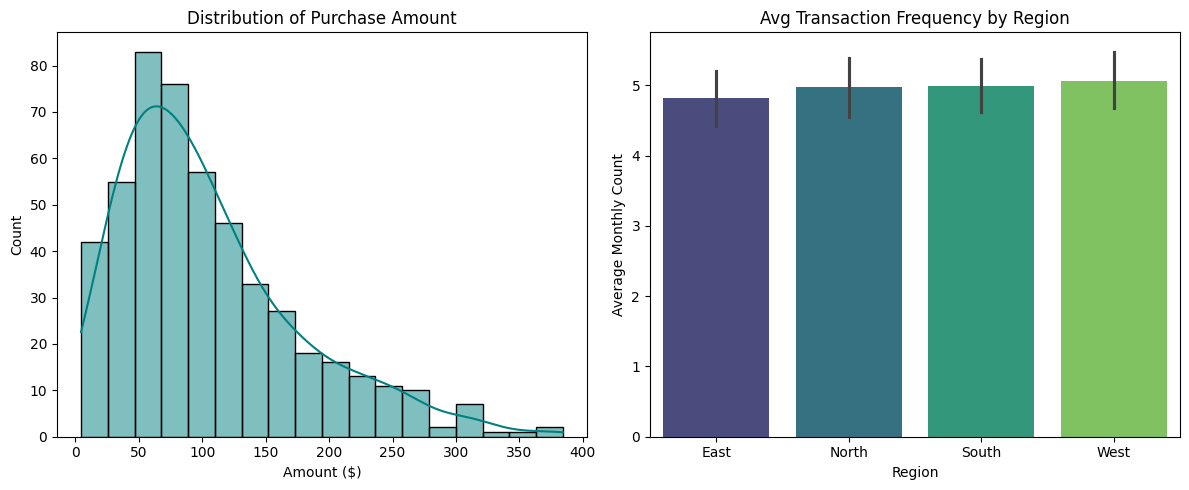

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seed for reproducibility
np.random.seed(42)

# --- TASK 1: Generate Synthetic Dataset ---
n_entries = 500
data = {
    'CustomerID': range(1001, 1001 + n_entries),
    'Age': np.random.randint(18, 71, size=n_entries),
    # Using Gamma distribution for PurchaseAmount (typical for spending data)
    'PurchaseAmount': np.random.gamma(shape=2.0, scale=50.0, size=n_entries),
    'TransactionFrequency': np.random.poisson(lam=5, size=n_entries),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], size=n_entries)
}

df = pd.DataFrame(data)

# --- TASK 2: Data Cleaning and Exploration ---
# Checking for missing values (synthetic data usually has none, but we verify)
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Ensuring correct data types
df['Region'] = df['Region'].astype('category')

# --- TASK 3: Descriptive Statistics ---
stats = df[['PurchaseAmount', 'Age']].describe().loc[['mean', '50%', 'std', '25%', '75%']]
stats.rename(index={'50%': 'median'}, inplace=True)
print("\nDescriptive Statistics:\n", stats)

# --- TASK 4: Visualizations ---
plt.figure(figsize=(12, 5))

# 1. Histogram of PurchaseAmount
plt.subplot(1, 2, 1)
sns.histplot(df['PurchaseAmount'], kde=True, color='teal')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Amount ($)')

# 2. Bar Chart: Avg TransactionFrequency by Region
plt.subplot(1, 2, 2)
sns.barplot(x='Region', y='TransactionFrequency', data=df, estimator=np.mean, palette='viridis')
plt.title('Avg Transaction Frequency by Region')
plt.ylabel('Average Monthly Count')

plt.tight_layout()
plt.show()